In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
import mysql.connector

In [3]:
mydb = mysql.connector.Connect(
    host = 'localhost',
    user = 'root',
    password = '77987798',
    database = 'iranketab_db'
)

بخش سوم: تحلیل بیشتر

به صورت کلی اگر هزینه‌های مربوط به دستمزد نویسنده یا مترجم، هزینه‌های اداری، و مجوز را کنار بگذاریم، اصلی‌ترین هزینه چاپ یک کتاب مربوط به چاپ آن است. در نتیجه اگر قیمت با تخفیف یک کتاب را بر تعداد صفحه آن تقسیم کنیم، میانگین درآمد ناشر بر روی هر صفحه آن کتاب بدست می‌آید. هزینه چاپ هر صفحه به قطع آن کتاب بستگی دارد و همچنین به نوع جلد و کیفیت کاغذ بستگی دارد. در اینجا دو مورد اول را در اختیار داریم. در این بخش به صورت کلی به دنبال آن هستیم از یک سو با داشتن میزان محبوبیت کتاب که اساسی‌ترین معیار آن امتیاز دریافتی است و از سوی دیگر قیمت فروش بر هر صفحه، بهترین ژانر و نوع کتاب را با توجه به شرایط و ویژگی‌های یک ناشر مشخص کنیم. در واقع تصویری به ناشر ارائه دهیم که تغییرات قیمت کتاب نسبت به امتیاز و دیگر معیارهای محبوبیت کتاب بسته به تغییر دسته‌بندی محتوایی کتاب، نوع جلد، قطع، خارجی‌بودن یا نبودن، ناشر و تعداد تجدید چاپ؛ چگونه تغییر می‌کند.  

در اولین گام در این مسیر، سه تحلیل زیر را بر پایه داده‌های استخراج‌شده از سایت ایران کتاب ارائه می‌دهیم. تحلیل اول و دوم به دنبال بررسی ناهمگنی تغییر رفتارهای قیمتی نسبت به امتیاز در انواع قطع، جلد و دسته‌بندی است. در تحلیل سوم با الگوگیری از معیار تمرکز صنایع و سهم هر ناشر در هر یک از دسته‌بندی‌های موضوعی کتاب، میزان رقابتی‌بودن هر موضوع را بدست آورده و اثر آن بر میانگین قیمت هر صفحه کتاب در آن موضوع را مشاهده کنیم. 

تحلیل اول:

متغیر قیمت تقسیم بر تعداد صفحه با تغییر مقدار امتیاز در هر یک از انواع قطع چگونه تفاوت می‌کند؟ به عبارتی آیا تغییر نوع قطع مي‌تواند موجب تغییر روند همبستگی این دو متغیر شود؟

In [50]:
#
sen_sql1 = "Select * from book inner join size on book.size_id=size.id inner join type_of_print on book.type_of_print_id=type_of_print.id where inventory=1 "
sen_df1 = pd.read_sql_query(sen_sql1, mydb)
sen_df1['priceofonepage'] = sen_df1['discount_price']/sen_df1['book_pages']

# fig1:
 #priceofonepage on rating in 9 size kind!
# fig2:
 # priceofonepage on rating in 9 type_of_print !



/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/3095124841.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen_df1 = pd.read_sql_query(sen_sql1, mydb)


In [51]:
sen_df1

,book_id,product_name,product_name_eng,isbn,book_code,release_date_sh,release_date_gc,rating,book_pages,print_series,...,discount_percent,type_of_print_id,publisher_id,size_id,summery_id,id,size_name,id,type_of_print,priceofonepage
0,1,کتاب جزء از کل,A Fraction of the Whole,978-600229500-2,43,1402,2008,3.70,656,80,...,15,1,1.0,1,1.0,1,رقعی,1,جلد سخت,511.814024
1,2,جزء از کل (مجموعه برگ و نوا),A Fraction of the Whole,978-600229500-2,71718,1402,2008,3.09,779,80,...,20,1,1.0,1,1.0,1,رقعی,1,جلد سخت,400.513479
2,3,جزء از کل,A Fraction of the Whole,978-600989648-6,92408,1401,2008,3.20,544,4,...,40,1,2.0,1,1.0,1,رقعی,1,جلد سخت,463.235294
3,4,جزء از کل,A Fraction of the Whole,978-600989640-0,92404,1401,2008,3.22,544,4,...,40,2,2.0,1,1.0,1,رقعی,2,شومیز,551.470588
4,5,کتاب بادبادک باز,The Kite Runner,978-964448297-7,2030,1400,2003,4.06,368,18,...,15,2,3.0,1,2.0,1,رقعی,2,شومیز,381.114130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73676,103836,کتاب اسرار عرفانی نماز,The Mystical secrets of prayer,978-600108570-3,121882,1402,,3.46,371,1,...,20,2,338.0,1,70408.0,1,رقعی,2,شومیز,409.703504
73677,103837,کتاب شاهنامک,Shahnamek,978-600180192-1,121887,1402,,3.98,138,1,...,20,2,312.0,1,70409.0,1,رقعی,2,شومیز,1449.275362
73678,103838,کتاب خواهران,Soeurs,978-622308052-4,121936,1402,2015,3.14,104,1,...,20,2,65.0,1,70410.0,1,رقعی,2,شومیز,615.384615
73679,103839,کتاب روان شناسی بازی,Game psychology,978-964001327-4,121937,1402,,3.29,280,6,...,25,2,14.0,2,70411.0,2,وزیری,2,شومیز,401.785714


تحلیل دوم:

در اینجا بررسی می‌کنیم آیا تغییرات قیمت نسبت به امتیاز در کتب ترجمه‌شده و کتب غیرترجمه‌شده یکسان است؟ ه 
از سوی دیگر دیگر در هرر بازه قیمتی، مقدار میانگین امتیاز هر یک از کتاب‌های ترجمه‌شده و نشده چگونه است؟

In [52]:
#
sen_sql2 = "Select * from book Left join book_translator on book.book_id=book_translator.book_id where inventory=1"
sen_df2 = pd.read_sql_query(sen_sql2, mydb)
sen_df2['priceofonepage'] = sen_df2['discount_price']/sen_df2['book_pages']

#sen_df2['translate']

# fig1:

# fig2:


/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/1627878158.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen_df2 = pd.read_sql_query(sen_sql2, mydb)


In [54]:
sen_df2

,book_id,product_name,product_name_eng,isbn,book_code,release_date_sh,release_date_gc,rating,book_pages,print_series,...,discount_price,discount_percent,type_of_print_id,publisher_id,size_id,summery_id,id,person_id,book_id,priceofonepage
0,1,کتاب جزء از کل,A Fraction of the Whole,978-600229500-2,43,1402,2008,3.70,656,80,...,335750,15,1.0,1.0,1.0,1.0,1.0,37608.0,1.0,511.814024
1,2,جزء از کل (مجموعه برگ و نوا),A Fraction of the Whole,978-600229500-2,71718,1402,2008,3.09,779,80,...,312000,20,1.0,1.0,1.0,1.0,2.0,37608.0,2.0,400.513479
2,3,جزء از کل,A Fraction of the Whole,978-600989648-6,92408,1401,2008,3.20,544,4,...,252000,40,1.0,2.0,1.0,1.0,3.0,16972.0,3.0,463.235294
3,3,جزء از کل,A Fraction of the Whole,978-600989648-6,92408,1401,2008,3.20,544,4,...,252000,40,1.0,2.0,1.0,1.0,4.0,16972.0,3.0,463.235294
4,4,جزء از کل,A Fraction of the Whole,978-600989640-0,92404,1401,2008,3.22,544,4,...,300000,40,2.0,2.0,1.0,1.0,NaN,NaN,NaN,551.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81374,103836,کتاب اسرار عرفانی نماز,The Mystical secrets of prayer,978-600108570-3,121882,1402,,3.46,371,1,...,152000,20,2.0,338.0,1.0,70408.0,107143.0,NaN,103836.0,409.703504
81375,103837,کتاب شاهنامک,Shahnamek,978-600180192-1,121887,1402,,3.98,138,1,...,200000,20,2.0,312.0,1.0,70409.0,107144.0,NaN,103837.0,1449.275362
81376,103838,کتاب خواهران,Soeurs,978-622308052-4,121936,1402,2015,3.14,104,1,...,64000,20,2.0,65.0,1.0,70410.0,NaN,NaN,NaN,615.384615
81377,103839,کتاب روان شناسی بازی,Game psychology,978-964001327-4,121937,1402,,3.29,280,6,...,112500,25,2.0,14.0,2.0,70411.0,NaN,NaN,NaN,401.785714


تحلیل سوم:

در این بخش کتاب‌ها در ۱۲ دسته اصلی موضوعی، در نظر می‌گیریم و در هر موضوع، تعداد سهم هر ناشر از کل کتاب‌های آن موضوع را بدست می‌آوریم. آنگاه سهم هر ناشر را به توان ۲ رسانده و مقدار بدست آمده برای همه ناشرها را در هر موضوع جمع می کنیم. با این کار معیاری مشابه معیار سنجش میزان تمرکز در صنعت بدست می‌آید که نشانگر میزان رقابت یا انحصار در هر یک از موضوعات است. در واقع هر چه سهم یک یا چند ناشر محدود از کتاب‌های یک موضوع بیشتر باشد، مقدار این معیار بزرگتر می‌شود و هر چه رقابت بیشتر باشد، این معیار کوچک خواهد شد. از سوی دیگر یکی از عوامل موثر بر گران‌بودن یا ارزان‌بودن نسبی یک موضوع یا نوعی از کتاب می‌تواند قدرت یک ناشر یا میزان رقابت در آن موضوع باشد که میانگین قیمت بر صفحه هر موضوع را نسبت به معیار تمرکز بدست آمده، مقایسه می‌کنیم.
همچنین میانگین امتیاز هر موضوع را با معیار تمرکز مقایسه می‌کنیم.

In [64]:
# 3
sen_sql3_cat1 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='ادبیات داستانی' "
sen3_cat1 = pd.read_sql_query(sen_sql3_cat1, mydb)

sen_sql3_cat2 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='خودپروری' "
sen3_cat2 = pd.read_sql_query(sen_sql3_cat2, mydb)

sen_sql3_cat3 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='روانشناسی' "
sen3_cat3 = pd.read_sql_query(sen_sql3_cat3, mydb)

sen_sql3_cat4 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='فلسفی' "
sen3_cat4 = pd.read_sql_query(sen_sql3_cat4, mydb)

sen_sql3_cat5 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='داستان کوتاه' "
sen3_cat5 = pd.read_sql_query(sen_sql3_cat5, mydb)

sen_sql3_cat6 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='ادبیات نمایشی' "
sen3_cat6 = pd.read_sql_query(sen_sql3_cat6, mydb)

sen_sql3_cat7 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='تاریخی' "
sen3_cat7 = pd.read_sql_query(sen_sql3_cat7, mydb)

sen_sql3_cat8 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='سیاسی' "
sen3_cat8 = pd.read_sql_query(sen_sql3_cat8, mydb)

sen_sql3_cat9 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='کتاب مصور' "
sen3_cat9 = pd.read_sql_query(sen_sql3_cat9, mydb)

sen_sql3_cat10 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='دینی و مذهبی' "
sen3_cat10 = pd.read_sql_query(sen_sql3_cat10, mydb)

sen_sql3_cat11 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='آموزشی' "
sen3_cat11 = pd.read_sql_query(sen_sql3_cat11, mydb)

sen_sql3_cat12 = "Select * from book "\
"inner join book_category on book.book_id=book_category.book_id "\
  "inner join Category on book_category.category_id=Category.id where category_name='کتاب کودک' "
sen3_cat12 = pd.read_sql_query(sen_sql3_cat12, mydb)


/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/2298871125.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen3_cat1 = pd.read_sql_query(sen_sql3_cat1, mydb)


/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/2298871125.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen3_cat2 = pd.read_sql_query(sen_sql3_cat2, mydb)
/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/2298871125.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen3_cat3 = pd.read_sql_query(sen_sql3_cat3, mydb)
/var/folders/0r/6nwh7td129301__r2brydjn00000gn/T/ipykernel_33787/2298871125.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sen3_cat4 = pd.read_sql_query(sen_sql3_c

In [65]:
HDD = {}
price = []
sen3_cat1.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat1['count'] = 1/len(sen3_cat1)
price.append(np.mean(sen3_cat1['discount_price']))
sen3_cat1 = sen3_cat1.groupby(by="publisher_id").sum()
HDD['ادبیات داستانی'] = np.sum(sen3_cat1['count']*sen3_cat1['count'])


sen3_cat2.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat2['count'] = 1/len(sen3_cat2)
price.append(np.mean(sen3_cat2['discount_price']))
sen3_cat2 = sen3_cat2.groupby(by="publisher_id").sum()
HDD['خودپروری'] = np.sum(sen3_cat2['count']*sen3_cat2['count'])

sen3_cat3.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat3['count'] = 1/len(sen3_cat3)
price.append(np.mean(sen3_cat3['discount_price']))

sen3_cat3 = sen3_cat3.groupby(by="publisher_id").sum()
HDD['روانشناسی'] = np.sum(sen3_cat3['count']*sen3_cat3['count'])

sen3_cat4.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat4['count'] = 1/len(sen3_cat4)
price.append(np.mean(sen3_cat4['discount_price']))
sen3_cat4 = sen3_cat4.groupby(by="publisher_id").sum()
HDD['فلسفی'] = np.sum(sen3_cat4['count']*sen3_cat4['count'])

sen3_cat5.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat5['count'] = 1/len(sen3_cat5)
price.append(np.mean(sen3_cat5['discount_price']))
sen3_cat5 = sen3_cat5.groupby(by="publisher_id").sum()
HDD['داستان کوتاه'] = np.sum(sen3_cat5['count']*sen3_cat5['count'])

sen3_cat6.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat6['count'] = 1/len(sen3_cat6)
price.append(np.mean(sen3_cat6['discount_price']))
sen3_cat6 = sen3_cat6.groupby(by="publisher_id").sum()
HDD['ادبیات نمایشی'] = np.sum(sen3_cat6['count']*sen3_cat6['count'])

sen3_cat7.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat7['count'] = 1/len(sen3_cat7)
price.append(np.mean(sen3_cat7['discount_price']))
sen3_cat7 = sen3_cat7.groupby(by="publisher_id").sum()
HDD['تاریخی'] = np.sum(sen3_cat7['count']*sen3_cat7['count'])

sen3_cat8.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat8['count'] = 1/len(sen3_cat8)
price.append(np.mean(sen3_cat8['discount_price']))
sen3_cat8 = sen3_cat8.groupby(by="publisher_id").sum()
HDD['سیاسی'] = np.sum(sen3_cat8['count']*sen3_cat8['count'])

sen3_cat9.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat9['count'] = 1/len(sen3_cat9)
price.append(np.mean(sen3_cat9['discount_price']))
sen3_cat9 = sen3_cat9.groupby(by="publisher_id").sum()
HDD['کتاب مصور'] = np.sum(sen3_cat9['count']*sen3_cat9['count'])

sen3_cat10.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat10['count'] = 1/len(sen3_cat10)
price.append(np.mean(sen3_cat10['discount_price']))
sen3_cat10 = sen3_cat10.groupby(by="publisher_id").sum()
HDD['دینی و مذهبی'] = np.sum(sen3_cat10['count']*sen3_cat10['count'])

sen3_cat11.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat11['count'] = 1/len(sen3_cat11)
price.append(np.mean(sen3_cat11['discount_price']))
sen3_cat11 = sen3_cat11.groupby(by="publisher_id").sum()
HDD['آموزشی'] = np.sum(sen3_cat11['count']*sen3_cat11['count'])

sen3_cat12.drop(columns={'product_name','product_name_eng','book_id','isbn','book_code','release_date_sh','release_date_gc','type_of_print_id','summery_id'},inplace=True)
sen3_cat12['count'] = 1/len(sen3_cat12)
price.append(np.mean(sen3_cat12['discount_price']))
sen3_cat12 = sen3_cat12.groupby(by="publisher_id").sum()
HDD['کتاب کودک'] = np.sum(sen3_cat12['count']*sen3_cat12['count'])

HDD
price

[62816.41705910054,
 76663.81765972721,
 71224.94205460617,
 74452.13232104121,
 37722.8673015873,
 44404.17307692308,
 99228.1848928974,
 76653.2317203155,
 52532.25523414585,
 59988.12706660369,
 56113.5111497545,
 37721.154471544716]

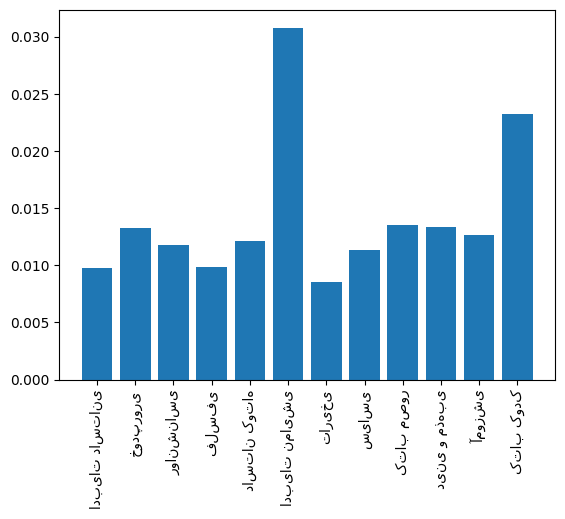

In [66]:
keys =  HDD.keys()
values = HDD.values()

plt.bar(keys, values)
plt.xticks(range(len(keys)), keys, rotation='vertical')
plt.show()

در اینجا مشاهده می‌کنیم که ادبیات نمایشی با داشتن بیشترین مقدار شاخص، انحصاری‌ترین موضوع از نظر انتشارات است. این مشاهده به واقعیت هم هماهنگ به نظر می‌رسد زیرا احتمالا ناشران تخصصی و مشخصی در این حوزه کم تقاضا حضور دارند.
اما جالب است که موضوع تاریخی کمترین مقدار را داشته و بیشترین رقابت میان ناشران این حوزه وجود دارد. به عبارت بهتر تعداد زیادی ناشر با سهم بازار کم در این موضوع فعالیت می‌کنند. بزرگ بودن کتاب کودک هم با توجه به تخصصی‌بودن ناشران و همچنین تقاضای خاص و مشخصی که دارد،‌ منطقی به نظر می‌رسد.
از نگاه دیگر شاید بتوان گفت به دلیل عامه‌پسند‌بودن موضوعات تاریخی، سیاسی و داستانی، ناشران زیادی فارغ از کیفیت به تولید محتوا در این حوزه‌ها می‌پردازند و رقابت در این حوزه‌ه ا بالاست.

حال در نمودار زیر مشاهده‌ می‌کنیم که چگونه با افزایش انحصار و کاهش رقابت، قیمت تغییر می‌کند:


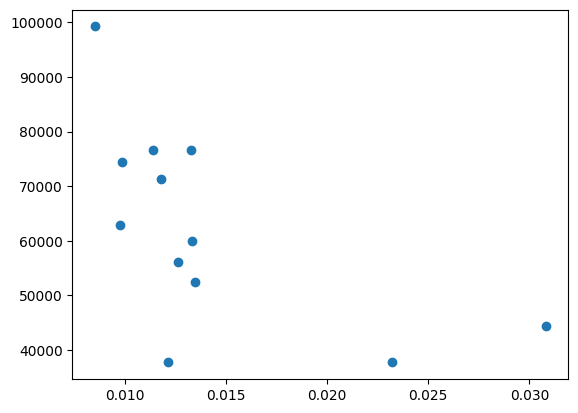

In [68]:
x = HDD.values()
y = price
plt.scatter(x, y)
plt.show()